## 自定义layers 与lambda 层

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.5.0
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)
matplotlib 3.4.2
numpy 1.19.5
pandas 1.3.0
sklearn 0.24.2
tensorflow 2.5.0
tensorflow.keras 2.5.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
layer = tf.keras.layers.Dense(100,input_shape=(None,5))
layer(tf.zeros([10,5]))

2021-08-01 10:31:24.206282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(10, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.,

In [6]:
layer.variables
# y = w*x + b 

[<tf.Variable 'dense/kernel:0' shape=(5, 100) dtype=float32, numpy=
 array([[ 0.09855886, -0.23843732, -0.08454487,  0.21505256,  0.09112488,
         -0.09025346, -0.06792766, -0.09341331,  0.03408681, -0.09782787,
          0.01746418,  0.11633126,  0.07452773,  0.1782477 ,  0.00270586,
          0.06234913,  0.09864987,  0.05005558, -0.07409498, -0.01325804,
          0.23388787, -0.21532327, -0.22378273,  0.15399636,  0.20081292,
          0.01091968,  0.19308384, -0.00632975, -0.17924018, -0.1777713 ,
          0.23596247, -0.20384762, -0.06602924, -0.00318295, -0.0800626 ,
          0.1972092 ,  0.01760684, -0.15872443,  0.18024878,  0.19325532,
         -0.15550324,  0.18174486, -0.17634061,  0.21560521,  0.1634052 ,
          0.08819355, -0.19804552,  0.21542038, -0.13132952,  0.03057255,
          0.13556124,  0.1532514 , -0.12714162,  0.07371946, -0.00742498,
          0.21128647, -0.10828881, -0.0556006 , -0.05604658,  0.19627337,
          0.06396852, -0.07421882, -0.115153

In [14]:
# tf.nn.softplus : log(1+e^x)
customized_softplus = keras.layers.Lambda(lambda x : tf.nn.softplus(x))
print(customized_softplus([-10.,-5.,0.,5.,10.]))

tf.Tensor([4.5398901e-05 6.7153485e-03 6.9314718e-01 5.0067153e+00 1.0000046e+01], shape=(5,), dtype=float32)


In [17]:
# customized dense layer.
class CustomizedDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        self.units = units
        self.activation = keras.layers.Activation(activation)
        super(CustomizedDenseLayer,self).__init__(**kwargs)
    
    def build(self, input_shape):
        """构建需要的参数 kernel and bias"""
        self.kernel = self.add_weight(name = 'kernel',
                                     shape=(input_shape[1],self.units),
                                     initializer = 'uniform',
                                     trainable = True)
        self.bias = self.add_weight(name = 'bias',
                                   shape=(self.units,),
                                   initializer='zeros',
                                   trainable=True)
        super(CustomizedDenseLayer, self).build(input_shape)
    
    def call(self, x):
        """完成正向计算"""
        return self.activation(x @ self.kernel + self.bias)


model = keras.models.Sequential([
    CustomizedDenseLayer(30, activation='relu',
                       input_shape=x_train.shape[1:]),
    CustomizedDenseLayer(1),
    customized_softplus
])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
customized_dense_layer_6 (Cu (None, 30)                270       
_________________________________________________________________
customized_dense_layer_7 (Cu (None, 1)                 31        
_________________________________________________________________
lambda_2 (Lambda)            (None, 1)                 0         
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


其他方法实现 activation
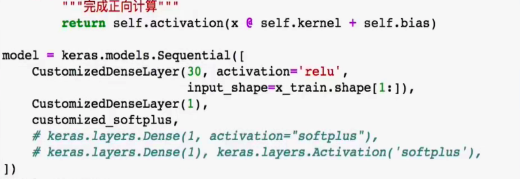

In [8]:
history = model.fit(x_train_scaled, y_train,
                    validation_data = (x_valid_scaled, y_valid),
                    epochs = 10,
                    callbacks = callbacks)

Epoch 1/10


2021-08-01 10:31:24.648649: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


363/363 [==============================] - 1s 2ms/step - loss: 1.0614 - val_loss: 0.6312
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5472 - val_loss: 0.5395
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4900 - val_loss: 0.5047
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4647 - val_loss: 0.4771
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4467 - val_loss: 0.4651
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4346 - val_loss: 0.4528
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4250 - val_loss: 0.4391
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4189 - val_loss: 0.4368
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4107 - val_loss: 0.4283
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4039 - val_loss: 0.4160


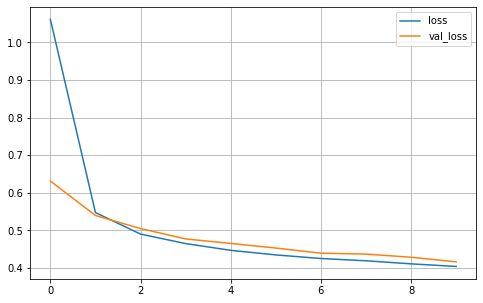

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4156


0.4155547022819519